* Begin to look at usage tab info - time series of [ app opens, match, swipe right, swipe left, message sent, message recieved] 

* Note: many functions updated in usage_analysis_fx script 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import json
import os 
import re

In [2]:
from importlib import reload

In [3]:
from Scripts import EDA_functions as mt_eda
reload(mt_eda)

<module 'Scripts.EDA_functions' from '/home/owner/Documents/Github_projects/Tinder_analysis/Scripts/EDA_functions.py'>

In [4]:
data_path = "Data/data.json"

In [5]:
with open(data_path, "rb") as inp: 
    data = json.load(inp)

In [6]:
data.keys()

dict_keys(['Messages', 'Photos', 'Places', 'Purchases', 'Spotify', 'Usage', 'User'])

In [7]:
for k1 in data.keys():
    if type(data[k1]) == dict:
        print(k1 , " : ", data[k1].keys())

Places  :  dict_keys(['recentPlaces', 'blockedPlaces', 'analytics'])
Purchases  :  dict_keys(['subscription', 'consumable', 'boost_tracking', 'super_like_tracking'])
Spotify  :  dict_keys(['spotify_connected', 'spotify_theme_track'])
Usage  :  dict_keys(['app_opens', 'swipes_likes', 'swipes_passes', 'matches', 'messages_sent', 'messages_received'])
User  :  dict_keys(['active_time', 'age_filter_max', 'age_filter_min', 'bio', 'birth_date', 'connection_count', 'create_date', 'education', 'email', 'full_name', 'gender', 'gender_filter', 'interested_in', 'interests', 'ip_address', 'is_traveling', 'jobs', 'name', 'pos', 'schools', 'travel_location_info', 'travel_pos', 'phone_id', 'college'])


In [8]:
data["Usage"].keys()

dict_keys(['app_opens', 'swipes_likes', 'swipes_passes', 'matches', 'messages_sent', 'messages_received'])

In [9]:
for k in data["Usage"].keys(): 
    print(k, " : ", len(data["Usage"][k]))

app_opens  :  667
swipes_likes  :  667
swipes_passes  :  667
matches  :  667
messages_sent  :  667
messages_received  :  667


## Look into the actual data

## Look into Usage Stats

In [10]:
usage_df = pd.DataFrame(data["Usage"])

In [11]:
usage_df.describe()

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,5.772114,0.283358,0.886057,1.095952,19.145427,5.136432
std,14.979233,0.803002,2.751287,3.211246,26.000603,8.902254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,8.000000,2.000000
75%,6.000000,0.000000,0.000000,1.000000,26.000000,7.000000
max,348.000000,10.000000,26.000000,36.000000,153.000000,87.000000


In [12]:
usage_df.head()

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
2014-11-22,3,0,0,0,32,0
2014-11-23,1,0,0,0,39,0
2014-11-24,1,0,0,0,3,0
2014-11-25,4,2,0,0,46,0
2014-11-26,19,1,0,0,67,4


In [13]:
usage_df.tail()

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
2018-11-29,5,1,0,1,42,16
2018-11-30,7,0,0,0,60,15
2018-12-01,3,0,0,0,30,1
2018-12-02,8,1,0,0,82,23
2018-12-03,8,0,0,0,51,18


In [14]:
usage_sums = usage_df.sum()
usage_sums

app_opens             3850
matches                189
messages_received      591
messages_sent          731
swipes_likes         12770
swipes_passes         3426
dtype: int64

In [15]:
derived_metrics = {}

In [16]:
# Number of swipes 
derived_metrics["total_swipes"] = usage_sums['swipes_likes'] + usage_sums['swipes_passes']

In [17]:
# Likes to passes (for every 1 pass there are x likes )
derived_metrics["like_to_pass_ratio"] = usage_sums['swipes_likes']/usage_sums['swipes_passes']
# I'm a lover not a hater 

In [18]:
# Number of swipes per app open 
derived_metrics["swipes/app_open"] = (usage_sums['swipes_likes'] + usage_sums['swipes_passes']) / usage_sums['app_opens']

In [19]:
# Avg Messages recieved per match
derived_metrics["n_avg_msg_rec_per_match"]=usage_sums['messages_received']/usage_sums['matches']

In [20]:
# Avg Messages sent per match
derived_metrics["n_avg_msg_sent_per_match"]= usage_sums['messages_sent']/usage_sums['matches']

In [21]:
usage_df.iloc[0].name

'2014-11-22'

In [22]:
days_on_tinder = pd.to_datetime(usage_df.iloc[-1].name) - pd.to_datetime(usage_df.iloc[0].name)
days_on_tinder = days_on_tinder.days
days_on_tinder

1472

In [23]:
active_days_on_tinder = len(usage_df.index)
active_days_on_tinder

667

In [24]:
# Avg Swipes per day 
derived_metrics["swipes_per_tot_cal_day"] = derived_metrics["total_swipes"]/days_on_tinder
derived_metrics["swipes_per_act_day"] = derived_metrics["total_swipes"]/active_days_on_tinder

In [25]:
pd.concat([usage_df.idxmax(), usage_df.max()], keys=["date", "max of index"], axis = 1)

,date,max of index
app_opens,2017-03-06,348
matches,2015-09-25,10
messages_received,2015-09-25,26
messages_sent,2015-09-25,36
swipes_likes,2015-09-26,153
swipes_passes,2016-06-12,87


In [26]:
derived_metrics

{'total_swipes': 16196,
 'like_to_pass_ratio': 3.7273788674839463,
 'swipes/app_open': 4.206753246753247,
 'n_avg_msg_rec_per_match': 3.126984126984127,
 'n_avg_msg_sent_per_match': 3.867724867724868,
 'swipes_per_tot_cal_day': 11.002717391304348,
 'swipes_per_act_day': 24.28185907046477}

In [27]:
derived_metrics = {k:np.round(v,2) for k, v in derived_metrics.items()}

## Analyze one of the usage plots 

In [28]:
usage_df.columns

Index(['app_opens', 'matches', 'messages_received', 'messages_sent',
       'swipes_likes', 'swipes_passes'],
      dtype='object')

In [29]:
def get_usage_time_series_plots(agg_series):
    """
    Plot several metrics for time series data 
    
    agg_series (dict): 
        key: string of which aggregation is used
        value: (pd.Series) Time series of metric with the index being a string of the year+month
    
    fig: (matplotlib figure) Returns plot with each aggregated metric in a row  
    """
    n_sub_plots = len(agg_series)
    fig = plt.figure()
    plot_index = 0
    for name, series in agg_series.items():
        plot_index = plot_index + 1
        ax = fig.add_subplot(n_sub_plots,1,plot_index)
        ax.plot(series)
        ax.set_title("Monthly "+ name + " (per day)")
        ax.grid(True)
        # Show every n (3rd) label on x axis  
        n = 3
        for index, label in enumerate(ax.xaxis.get_ticklabels()):
            if index % n != 0:
                label.set_visible(False) 
        
        fig.autofmt_xdate()
        ax.set_xlabel("Year + Month")
        y_label_str = name.replace('mean', '')
        y_label_str = y_label_str.replace('max', '')
        ax.set_ylabel("Number of "+y_label_str)
    fig.tight_layout()
        
    return(fig)

In [30]:
usage_df2 = usage_df.copy()
usage_df2.index = pd.to_datetime(usage_df.index, format = "%Y-%m-%d")
usage_df2.index = pd.Series(usage_df2.index).apply(mt_eda.flatten_date)

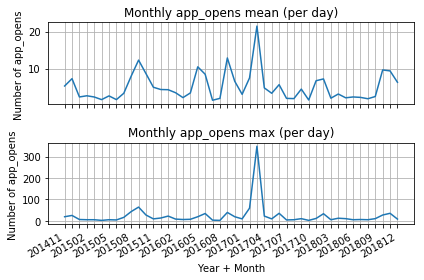

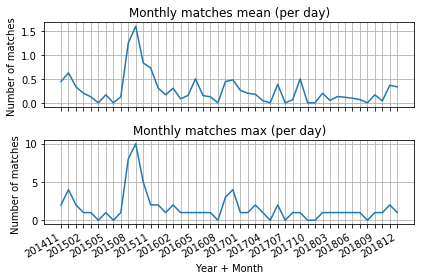

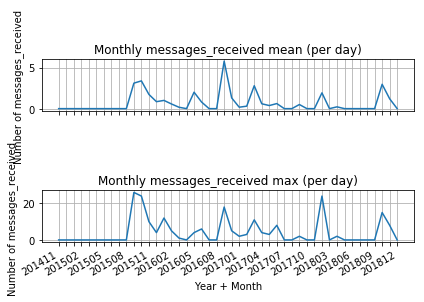

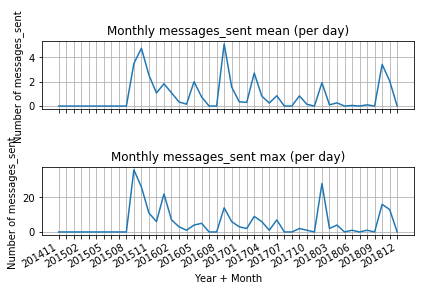

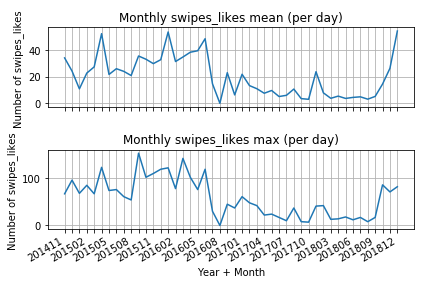

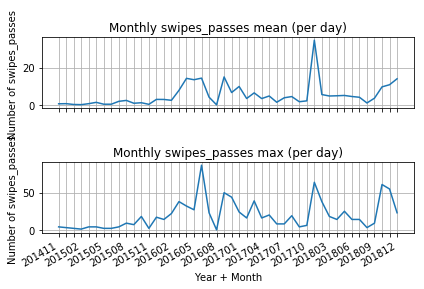

In [31]:
funcs = {"mean" : np.mean, "max":np.max }# , "std":np.std}
plt_dict = {}
for usage_col in usage_df2.columns:
    gb_dt = pd.Series(usage_df2[usage_col]).groupby(usage_df2.index)
    agg_series = {usage_col + " " +func_names:gb_dt.apply(func) for func_names, func in funcs.items()}
    plts = get_usage_time_series_plots(agg_series)
    plt_dict[usage_col] = plts

** TODO: Turn Tables into matplotlib table ** 

In [32]:
def gather_max_usage(usage_df):

    # Dates of max_usage
    max_usage = pd.concat([usage_df.idxmax(), usage_df.max()], keys=["date", "max of index"], axis = 1)
    max_usage.reset_index(inplace=True)
    max_usage.rename({'index':'metric'}, axis =1 , inplace = True)
    return(max_usage)


In [33]:
def gather_usage_stats(usage_df):

    usage_sums = usage_df.sum()
    derived_metrics = {}
    # Number of swipes
    derived_metrics["total_swipes"] = usage_sums['swipes_likes'] + usage_sums['swipes_passes']
    # Likes to passes (for every 1 pass there are x likes )
    derived_metrics["like_to_pass_ratio"] = usage_sums['swipes_likes']/usage_sums['swipes_passes']
    # Number of swipes per app open
    derived_metrics["swipes/app_open"] = (usage_sums['swipes_likes'] + usage_sums['swipes_passes']) / usage_sums[
        'app_opens']
    # Avg Messages recieved per match
    derived_metrics["n_avg_msg_rec_per_match"] = usage_sums['messages_received'] / usage_sums['matches']
    # Avg Messages sent per match
    derived_metrics["n_avg_msg_sent_per_match"] = usage_sums['messages_sent'] / usage_sums['matches']
    # Calendar days on tinder
    days_on_tinder = pd.to_datetime(usage_df.iloc[-1].name) - pd.to_datetime(usage_df.iloc[0].name)
    days_on_tinder = days_on_tinder.days
    # Days when you opened the app
    active_days_on_tinder = len(usage_df.index)

    # Avg Swipes per day
    derived_metrics["swipes_per_tot_cal_day"] = derived_metrics["total_swipes"] / days_on_tinder
    derived_metrics["swipes_per_act_day"] = derived_metrics["total_swipes"] / active_days_on_tinder

    derived_metrics = {k: np.round(v, 2) for k, v in derived_metrics.items()}

    return(derived_metrics)


In [62]:
def plot_table(text_df, text=""):
    """
    Plot table in matplotlib 
    
    
    """
    
    # Create figure 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.axis('off')
    ax.axis('tight')
    # Input data into plot 
    ax.table(cellText = text_df.values
             , colLabels = text_df.columns
             , loc='center')
    
    ax.text(0.05, 0.95, text, transform = fig.transFigure, size=16)
    fig.tight_layout()
    
    return(fig)

In [63]:
max_usage = gather_max_usage(usage_df)
derived_metrics = gather_usage_stats(usage_df)

In [66]:
max_usage

,metric,date,max of index
0,app_opens,2017-03-06,348
1,matches,2015-09-25,10
2,messages_received,2015-09-25,26
3,messages_sent,2015-09-25,36
4,swipes_likes,2015-09-26,153
5,swipes_passes,2016-06-12,87


In [64]:
derived_metrics_df = pd.Series(derived_metrics).reset_index().rename({'index':"metric", 0 : "value"}, axis = 1)

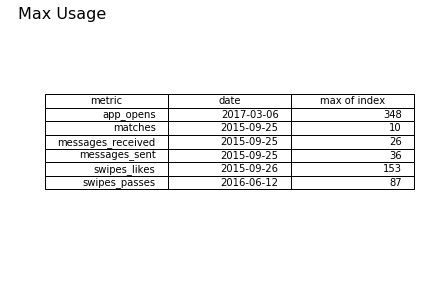

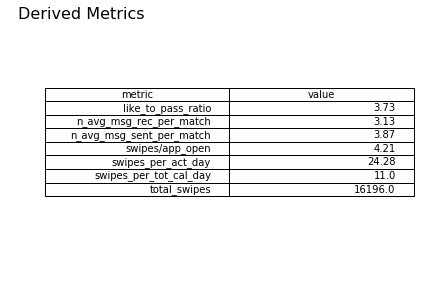

In [65]:
max_usg_tbl = plot_table(max_usage, text = "Max Usage")
derived_metrics_tbl = plot_table(derived_metrics_df, text = "Derived Metrics")

## Create PDF of plots

In [38]:
from matplotlib.backends.backend_pdf import PdfPages

In [39]:
pp = PdfPages('usage plots.pdf')

In [40]:
for usage, temp_plt in plt_dict.items():
    pp.savefig(temp_plt)
    pp.attach_note(usage + " plot")

pp.savefig(max_usg_tbl)
pp.savefig(derived_metrics_tbl)

pp.close()